<a href="https://colab.research.google.com/github/shameer-phy/Pandas_EDA/blob/main/Project_Geo_spatial_Analysis/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#We will process the data to make it ready for usage in the model

In [1]:
#Read the Dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Datasets/GlobalLandTemperaturesByCity.csv')

In [4]:
df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [5]:
usa = df[df['Country']=='United States']


In [6]:
usa['City'].unique()
usa.shape

(687289, 7)

In [74]:
req_cities = ['New York','Los Angeles','San Francisco']
usa_data = usa[usa['City'].isin(req_cities)]

In [75]:
usa_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
4356748,1849-01-01,8.819,2.558,Los Angeles,United States,34.56N,118.70W
4356749,1849-02-01,9.577,1.970,Los Angeles,United States,34.56N,118.70W
4356750,1849-03-01,11.814,2.173,Los Angeles,United States,34.56N,118.70W
4356751,1849-04-01,13.704,2.902,Los Angeles,United States,34.56N,118.70W
4356752,1849-05-01,14.834,2.017,Los Angeles,United States,34.56N,118.70W


In [76]:
usa_data = usa_data[['dt','AverageTemperature']]

In [77]:
usa_data.head()

,dt,AverageTemperature
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [78]:
usa_data.dtypes
usa_data['dt']=pd.to_datetime(usa_data['dt'])

In [79]:
usa_data.dtypes
usa_data.columns = ['Date', 'Temp']

In [80]:
usa_data.head()

,Date,Temp
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [81]:
usa_data.isnull().sum()

Date      0
Temp    120
dtype: int64

In [82]:
usa_data.dropna(inplace=True)

In [83]:
usa_data.isnull().sum()

Date    0
Temp    0
dtype: int64

#For Time Series analysis it is required that row indexes are datetime objects

In [84]:
usa_data.set_index('Date',inplace=True)
usa_data.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


#Check if data is stationery or not. If not, make it stationery.
Stationery means average and std should not change with time.

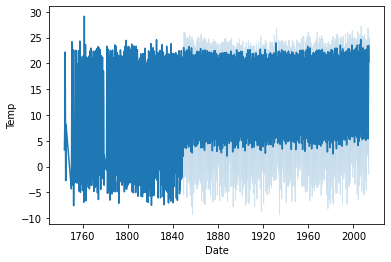

In [ ]:
import seaborn as sns
sns.lineplot(x=usa_data.index,y=usa_data['Temp'])

In [18]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
test_result = adfuller(usa_data['Temp'])
test_result

(-2.0063893036757956,
 0.28377865833332594,
 35,
 7037,
 {'1%': -3.431279613044704,
  '10%': -2.5669886726127307,
  '5%': -2.8619508146206374},
 28011.222669408726)

In [20]:
def adfuller_test(Temp):
  result = adfuller(Temp)
  labels = ['ADF Test Statistic','P-value','#lags used', 'Number of observations used']
  for value, label in zip(result,labels):
    print(label + ':' + str(value))
  if result[1] < 0.05:
    print('Reject null hypothesis. Data is stationary')
  else:
    print('Failed to reject null hypothesis. Data is not stationery')

In [21]:
adfuller_test(usa_data['Temp'])

ADF Test Statistic:-2.0063893036757956
P-value:0.28377865833332594
#lags used:35
Number of observations used:7037
Failed to reject null hypothesis. Data is not stationery


In [22]:
usa_copy = usa_data.copy()
usa_copy

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834
...,...
2013-05-01,17.434
2013-06-01,19.759
2013-07-01,20.657


In [23]:
usa_copy['first temp diff']=usa_copy['Temp'] - usa_copy['Temp'].shift(12)

In [24]:
usa_copy

,Temp,first temp diff
Date,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN
...,...,...
2013-05-01,17.434,0.879
2013-06-01,19.759,1.277
2013-07-01,20.657,1.025


In [25]:
adfuller_test(usa_copy['first temp diff'].dropna())

ADF Test Statistic:-21.23965040491091
P-value:0.0
#lags used:35
Number of observations used:7025
Reject null hypothesis. Data is stationary


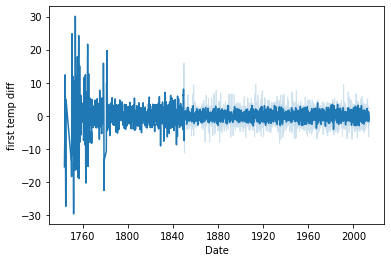

In [ ]:
sns.lineplot(x=usa_copy.index,y=usa_copy['first temp diff'],sizes=(15,15))

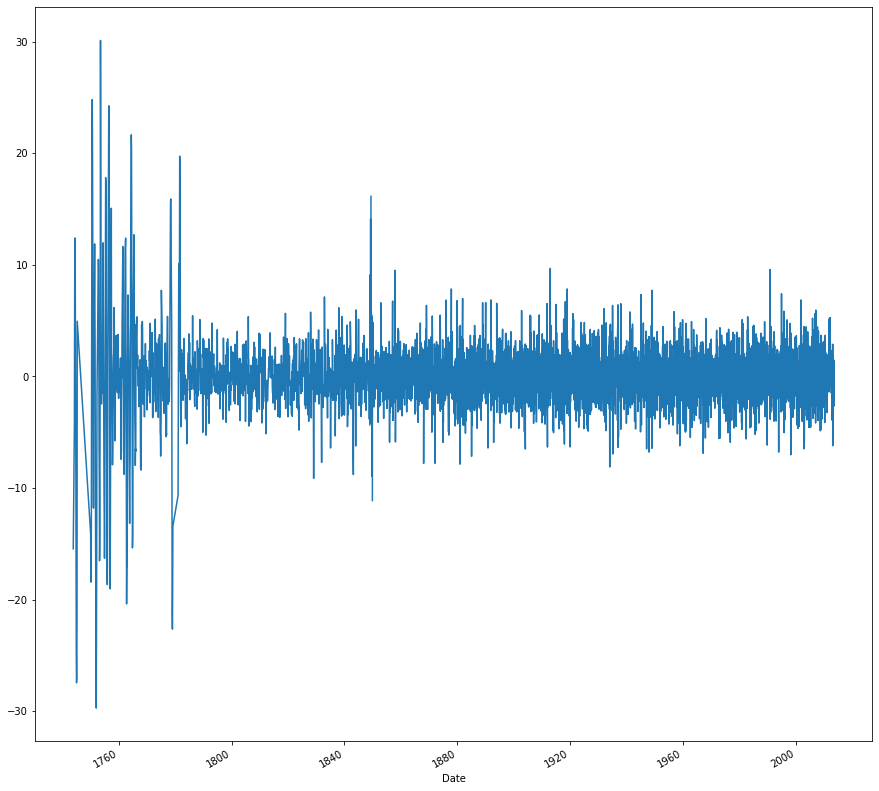

In [26]:
usa_copy['first temp diff'].plot(figsize=(15,15))

#Check the data for seasonality

In [29]:
usa_copy.head()
usa_data.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


In [70]:
usa_copy['month'] = usa_copy.index.month

In [71]:
usa_copy['year'] = usa_copy.index.year

In [72]:
usa_copy.head()

,Temp,first temp diff,month,year
Date,,,,
1849-01-01,8.819,NaN,1,1849
1849-02-01,9.577,NaN,2,1849
1849-03-01,11.814,NaN,3,1849
1849-04-01,13.704,NaN,4,1849
1849-05-01,14.834,NaN,5,1849


#Month-wise seasonality

In [73]:
pivot1 = usa_copy.pivot_table(index='month',columns='year',values='Temp')

In [57]:
pivot1

year,1743,1744,1745,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,1775,1776,1777,1778,1779,1781,1782,1783,1784,1785,1786,1787,...,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,-2.363,-4.310,-3.591,-7.588,-3.122,-2.252,-3.193,-1.985,-4.790,-4.982,-3.350,-4.200,-6.900,NaN,-6.632,-3.228,-4.023,-4.324,-3.511,-3.644,-1.794,-4.794,-0.039,-3.740,-2.708,-6.386,-1.127,-4.406,-1.703,-2.395,-3.598,-0.665,-5.170,-5.014,-6.080,-5.126,-5.301,-3.090,...,5.127667,5.626000,4.656000,2.853000,5.315667,4.232000,6.137667,4.609333,2.471333,5.545667,5.025667,3.456333,6.919667,4.341333,4.239333,5.147667,6.616333,5.261000,5.225000,5.428667,4.193667,6.597333,5.424333,5.256000,7.141667,5.741000,5.895000,4.700000,6.146333,6.581000,4.080333,4.923000,7.135333,5.656000,5.216333,5.550333,5.776667,5.109333,7.177667,5.388333
2,NaN,NaN,-2.671,-2.719,-2.051,NaN,-1.467,-2.583,-1.802,0.259,-1.507,-3.689,-0.007,-1.327,-2.162,-2.559,-4.010,0.683,-0.558,0.621,-2.073,1.139,-2.480,-1.657,-4.020,-1.898,-5.051,-1.681,1.335,-1.976,-1.677,NaN,2.204,-0.648,-3.844,-0.450,-6.486,-3.453,-2.107,-2.790,...,5.662667,6.281667,7.368333,7.452667,5.175333,3.688333,6.836000,8.354667,6.975333,7.220000,7.720333,6.714000,7.027000,6.387333,7.453000,5.177000,6.446333,8.873667,8.014000,5.216667,4.808333,7.207333,7.335333,7.907333,7.082000,6.718000,7.085667,5.958667,8.562333,5.698667,6.100000,7.297000,7.547667,5.634000,6.754333,6.540667,6.788000,5.777333,7.970000,6.222667
3,NaN,NaN,1.363,2.773,3.256,3.322,4.207,2.728,1.112,NaN,2.260,1.532,2.711,1.358,3.621,0.760,0.710,2.562,3.977,2.801,2.647,0.857,2.086,0.316,2.995,-0.539,2.469,3.005,4.784,1.712,2.658,NaN,2.134,2.728,0.662,1.627,0.747,-1.343,4.104,3.155,...,9.027000,7.811000,9.111333,8.860000,9.616333,9.672667,8.304333,8.616333,7.892333,9.554000,9.205000,8.559000,10.600667,9.539333,10.487000,9.740667,9.968333,8.267667,9.111667,9.618333,9.729667,9.750667,9.155667,10.656667,9.817000,8.002667,10.464333,9.645667,9.430000,10.064000,12.184000,9.124667,7.527333,10.586000,9.733667,9.211000,10.486667,9.115000,10.604333,10.162333
4,NaN,9.788,8.209,8.848,7.992,7.402,8.099,NaN,8.714,NaN,7.666,7.768,7.991,8.617,8.279,9.184,8.061,NaN,9.915,8.662,8.550,6.302,8.157,8.689,8.771,9.009,9.441,12.664,8.367,8.185,7.094,NaN,NaN,7.723,10.131,8.539,6.116,7.245,8.086,8.756,...,12.383667,9.173333,11.731000,13.274333,11.294667,12.076000,12.665333,13.318333,11.412000,11.080333,11.978667,13.967333,12.623667,14.256000,12.559667,13.814667,13.552333,12.525000,13.680667,13.064667,13.179333,11.791333,13.601333,12.861333,11.865000,11.593667,13.185000,11.586000,13.032667,10.623000,13.806333,12.546000,12.051667,12.342000,13.113000,12.744000,12.254000,12.710000,13.075000,13.880000
5,NaN,15.708,NaN,15.411,NaN,NaN,15.330,NaN,15.238,NaN,15.332,13.844,14.739,14.091,18.068,15.511,13.984,NaN,15.262,15.176,13.560,13.484,13.858,14.300,16.185,13.882,16.254,NaN,17.038,NaN,13.042,13.965,NaN,14.866,15.515,15.389,14.210,13.007,14.358,13.978,...,15.614333,16.759333,16.382333,14.889000,16.615000,16.897333,15.415000,16.602333,16.372333,15.829333,17.296333,16.205333,16.896333,17.149667,16.171333,16.125667,15.613333,16.211000,17.499333,17.112667,15.531667,14.833333,16.592333,17.981000,15.105333,15.567000,17.351000,18.744667,15.693333,15.874000,17.817333,15.982333,17.123333,17.150000,15.800333,17.565667,15.856333,15.724000,17.670333,17.335333
6,NaN,21.210,NaN,19.017,20.724,NaN,20.820,20.075,19.964,20.488,22.461,19.097,19.267,18.554,25.728,20.677,19.517,17.642,NaN,20.605,NaN,17.737,20.674,19.440,20.092,19.348,20.253,19.994,18.539,19.891,18.438,18.564,NaN,19.033,21.032,21.182,19.949,20.938,20.754,19.443,...,19.653667,19.174333,20.658000,19.615667,19.776333,19.849667,18.431667,

Text(0.5, 0, 'Month')

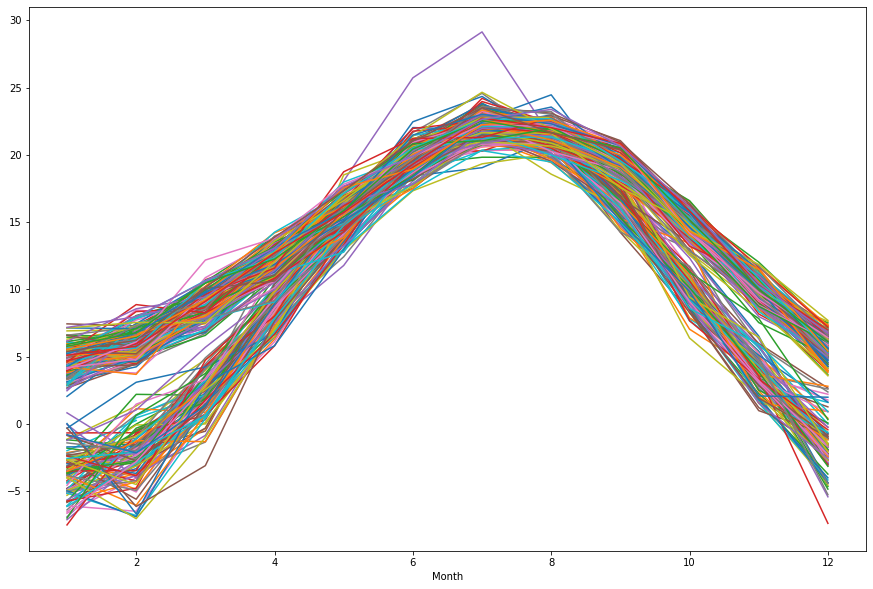

In [63]:
import matplotlib.pyplot as plt
pivot1.plot(figsize=(15,10))
plt.legend().remove()
plt.xlabel('Month')

In [65]:
piv_avg = pivot1.mean(axis=1)

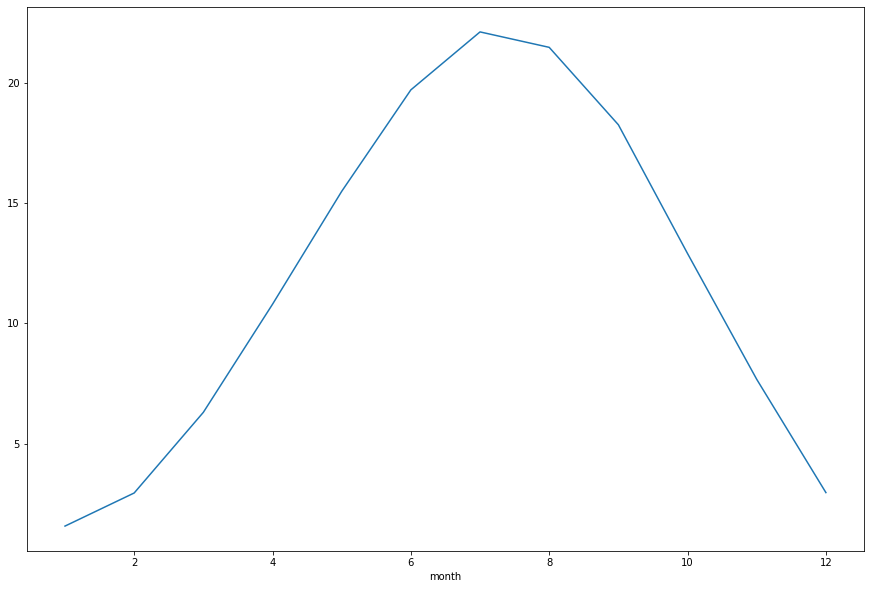

In [66]:
piv_avg.plot(figsize=(15,10))

In [67]:
piv_avg2 = pivot1.mean(axis=0)

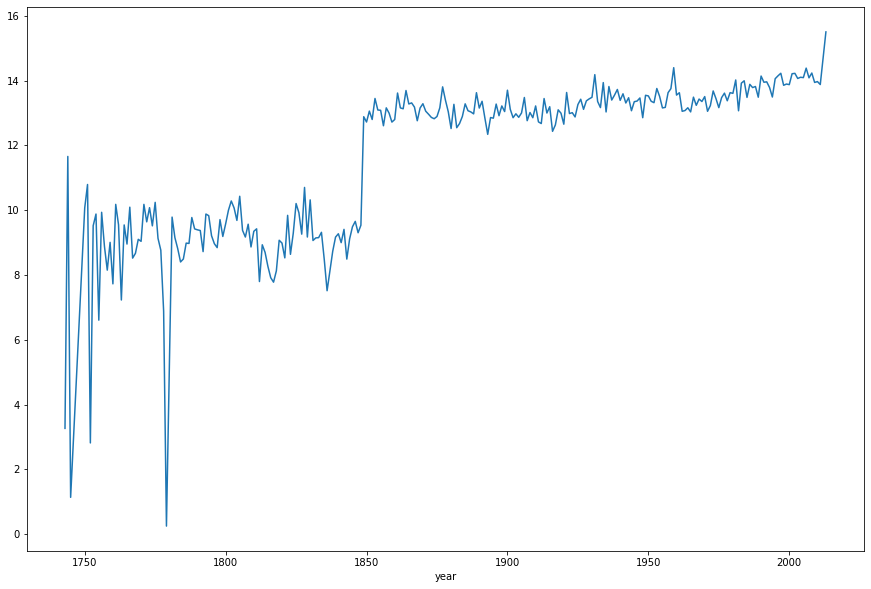

In [68]:
piv_avg2.plot(figsize=(15,10))

#Build a Moving average model

In [125]:
usa_copy.head(20)

,Temp,first temp diff,month,year
Date,,,,
1849-01-01,8.819,NaN,1,1849
1849-02-01,9.577,NaN,2,1849
1849-03-01,11.814,NaN,3,1849
1849-04-01,13.704,NaN,4,1849
1849-05-01,14.834,NaN,5,1849
1849-06-01,21.173,NaN,6,1849
1849-07-01,26.159,NaN,7,1849
1849-08-01,26.099,NaN,8,1849
1849-09-01,21.848,NaN,9,1849


In [106]:
usa_copy2 = usa_copy.copy()
usa_copy2 = usa_copy2['first temp diff']

In [108]:
usa_copy2.dropna(inplace=True)

In [114]:
usa_copy2.rolling(window=5).mean()

Date
1850-01-01       NaN
1850-02-01       NaN
1850-03-01       NaN
1850-04-01       NaN
1850-05-01   -0.4706
               ...  
2013-05-01    0.4336
2013-06-01    1.0236
2013-07-01    1.4060
2013-08-01    0.8454
2013-09-01    0.7614
Name: first temp diff, Length: 7061, dtype: float64

In [115]:
dat = pd.DataFrame(usa_copy2)

In [128]:
pred_tbl = pd.concat([dat,usa_copy2.rolling(window=5).mean()],axis=1)

In [129]:
pred_tbl

,first temp diff,first temp diff
Date,,
1850-01-01,-1.732,NaN
1850-02-01,-1.002,NaN
1850-03-01,-1.449,NaN
1850-04-01,0.031,NaN
1850-05-01,1.799,-0.4706
...,...,...
2013-05-01,0.879,0.4336
2013-06-01,1.277,1.0236
2013-07-01,1.025,1.4060


In [130]:
pred_tbl.columns = ['Actual change', 'Predicted change']

In [131]:
pred_tbl

,Actual change,Predicted change
Date,,
1850-01-01,-1.732,NaN
1850-02-01,-1.002,NaN
1850-03-01,-1.449,NaN
1850-04-01,0.031,NaN
1850-05-01,1.799,-0.4706
...,...,...
2013-05-01,0.879,0.4336
2013-06-01,1.277,1.0236
2013-07-01,1.025,1.4060


#Evaluate the model with RMSE

In [132]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [134]:
np.sqrt(mean_squared_error(pred_tbl['Actual change'][4:],pred_tbl['Predicted change'][4:]))

2.3934235122562058